In [75]:
from os import listdir
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imsave, imshow
import numpy as np
import pandas as pd
import math
from scipy.signal import convolve2d
import scipy.signal as ss
from scipy import ndimage
from skimage import img_as_ubyte, img_as_float
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import time
import copy
from skimage.color import rgb2gray
from sklearn.metrics import mean_squared_error as MSE
from metrics import prepare_img1, mm, norm
from scipy.ndimage.filters import gaussian_filter 

import gc
import os.path
import sys
import cv2 as cv
gc.enable()


ImportError: cannot import name 'mm' from 'metrics' (/home/vados/Repos/DeblurGANv2/metrics.py)

In [108]:
def get_merge_mask(orig_img, threshold = 0.05, sigma = 10):
    wb_img = rgb2gray(orig_img)
    sobelx = cv.Sobel(wb_img,cv.CV_64F,1,0,ksize=5)
    sobely = cv.Sobel(wb_img,cv.CV_64F,0,1,ksize=5)

    s2 = norm(sobelx**2 + sobely**2)
    blurred = norm(gaussian_filter(s2, sigma=sigma))

    return gaussian_filter((blurred > threshold), sigma=2)

In [109]:
def mask_images(blurred, restored):
    mask = get_merge_mask(blurred)
    image = np.zeros_like(blurred)
    dims = restored.shape[-1]
    for cur_dimension in range(dims):
        image[:,:,cur_dimension] = img_r[:,:,cur_dimension] * mask + img_b[:,:,cur_dimension] * (1 - mask)
    return image

In [140]:
img_name = 'img_16.png'
# img_b = rgb2gray(prepare_img1(cv.imread('../Diploma-1/pict/random_params/blurred/img_2.png')))
# img_r = rgb2gray(prepare_img1(cv.imread('../Diploma-1/pict/d/l07/img_2.png')))
img_b = prepare_img1(plt.imread('../Diploma-1/pict/random_params/blurred/' + img_name))
img_r = prepare_img1(plt.imread('../Diploma-1/pict/d/l07/' + img_name))

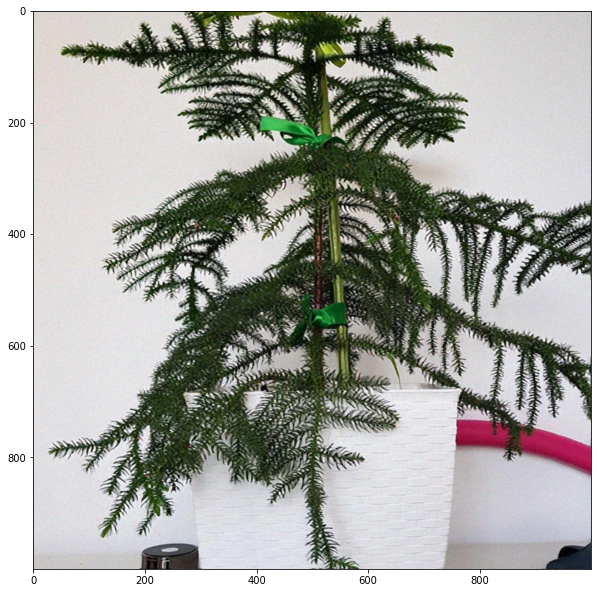

In [141]:
plt.figure(figsize=(10,15))
masked = mask_images(img_b, img_r)
plt.imshow(masked)
plt.imsave('../Diploma-1/pict/d/masked/' + img_name, masked) #get_merge_mask(img_b)
plt.imsave('../Diploma-1/pict/d/masked/mask_' + img_name, get_merge_mask(img_b), cmap='gray') 

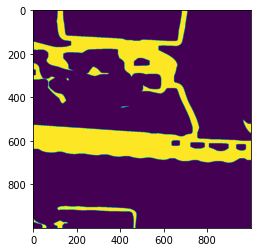

In [130]:
# plt.imshow(img_r)
plt.imshow(get_merge_mask(img_b))